# superposition for linear static/dynamic systems

# The superposition theorem states is that F(x1+x2) = F(x1) +  F(x2) 
# If a function follows the superposition theorem than that function is linear

## code example showing examples

In [1]:
def linear_function(x):
    f = 2*x
    return f

def not_linear_function(x):
    f = 2*(x**2)
    return f
    

x1 = 2
x2 = 3
x_total = x1 + x2

# proving linear function is linear
F_x1 = linear_function(x1)
F_x2 = linear_function(x2)
F_x1_plus_x2 = linear_function(x_total)

print('Linear function is F = 2x x1 = {} and x2 = {}'.format(x1, x2))
print("F(x1 + x2) equals {} and F(x1) + F(x2) equals {}".format(F_x1_plus_x2, (F_x1 + F_x2)))
print("since F(x1 + x2) = F(x1) + F(x2) than the function is linear\n ")


# proving not_linear function is not linear 
F_x1 = not_linear_function(x1)
F_x2 = not_linear_function(x2)
F_x1_plus_x2 = not_linear_function(x_total)

print('Non linear function is y = 2x^2 x1 = {} and x2 = {}'.format(x1, x2))
print("F(x1 + x2) equals {} and F(x1) + F(x2) equals {}".format(F_x1_plus_x2, (F_x1 + F_x2)))
print("since F(x1 + x2) != F(x1) + F(x2) than the function is not linear\n ")



Linear function is F = 2x x1 = 2 and x2 = 3
F(x1 + x2) equals 10 and F(x1) + F(x2) equals 10
since F(x1 + x2) = F(x1) + F(x2) than the function is linear
 
Non linear function is y = 2x^2 x1 = 2 and x2 = 3
F(x1 + x2) equals 50 and F(x1) + F(x2) equals 26
since F(x1 + x2) != F(x1) + F(x2) than the function is not linear
 


# links to info about superposition can be found here
https://en.wikipedia.org/wiki/Superposition_theorem
<br>
https://www.youtube.com/watch?v=yJR5BOvv4-A

# Convolve stuff

# This code was convert from matlab to python 
# The orginal source of this code was https://lpsa.swarthmore.edu/Convolution/Convolution.html
# To learn how to convert matlab to python here are some helpful links https://numpy.org/doc/stable/user/numpy-for-matlab-users.html
## The following code generated our input vs time graph for a function

In [2]:
RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    print('Downloading packages')
    !pip install slycot
    !pip install control

     |████████████████████████████████| 1.5 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1418255 sha256=e34622ec2a08dae752a20eb59f48ef4c1c7718f84e792f318cdf03db0512641d
  Stored in directory: /root/.cache/pip/wheels/fa/b2/19/1e6568896fbabaf2a03d2fb6575211d281afcb9e00ce026cf6
Successfully built slycot
     |████████████████████████████████| 357 kB 4.9 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=8ab543b2fb671a83d27ef363bd6c77000daf2e41ef26733d00571caa19485be1
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


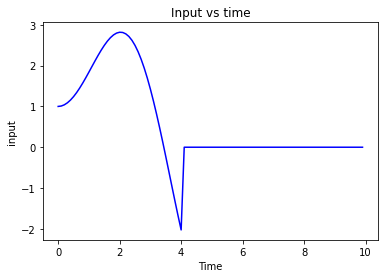

In [3]:
from control.timeresp import impulse_response
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
from math import sin
%matplotlib inline

DT = 0.1
DT1 = 0.8
DT2 = 0.3

t = np.arange(0,10,DT)
t1 = np.arange(0,10,DT1)
t2 = np.arange(0,10,DT2)
F = []
for i in range(len(t)):

  f = (sin(t[i]) * t[i] + 1) * (t[i]<4.1) 
  F.append(f)

F1 = []
for i in range(len(t1)):

  f = (sin(t1[i]) * t1[i] + 1) * (t1[i]<4.1) 
  F1.append(f)

F2 = []
for i in range(len(t2)):

  f = (sin(t2[i]) * t2[i] + 1) * (t2[i]<4.1) 
  F2.append(f)

sys = tf(1,[1,1,1])
plt.plot(t,F,'b')
plt.xlabel('Time')
plt.ylabel('input')
plt.title('Input vs time')
plt.show()

The following code represents our continous function from above by a discrete function with dt of 0.8

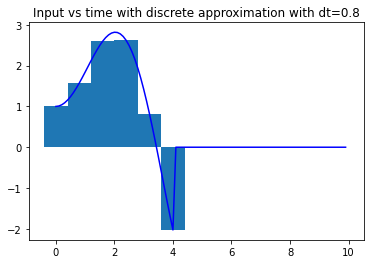

In [4]:
plt.plot(t,F,'b')
plt.bar(t1,F1,0.8)
plt.title('Input vs time with discrete approximation with dt=0.8')
plt.show()

The superposition theorem states that the response of the system to the string of impulses is just the sum of the response to the individual impulses.  The response of the system to the individual impulses with a dt of 0.8 is shown below.

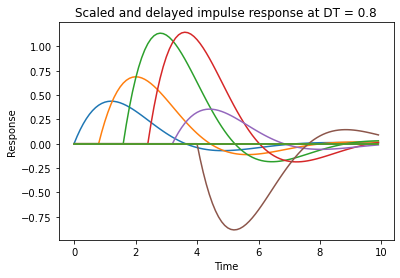

In [5]:
T, h = impulse_response(sys,t)

imp = np.zeros((len(t), len(t1)))

for i in range(len(t1)):
  offset = (i)*round(DT1/DT)
  x = h*F1[i] * DT1
  imp[(offset):len(t),i] = x[0:(len(t) - offset)]
  plt.plot(t,imp[:,i])
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Scaled and delayed impulse response at DT = 0.8')
plt.show()

The summed response is shown in the graph below

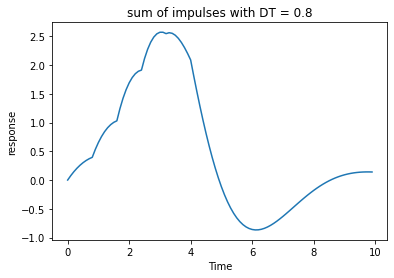

In [6]:
approx = np.sum(imp,1)
plt.plot(t,approx)
plt.title('sum of impulses with DT = 0.8')
plt.xlabel('Time')
plt.ylabel('response')
plt.show()

The summed response is shown in the graph below but this time with a dt of 0.3. We can see that the respose with a dt of 0.3 looks better than the 0.8 graph due to being sampled more. 

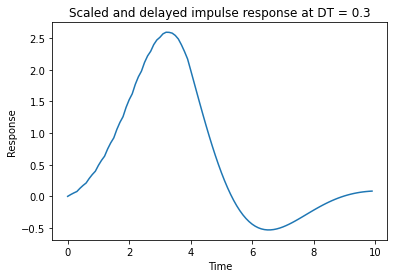

In [7]:
imp2 = np.zeros((len(t), len(t2)))
for i in range(len(t2)):
  offset = (i)*round(DT2/DT)
  x = h*F2[i] * DT2
  imp2[(offset):len(t),i] = x[0:(len(t) - offset)]

approx2 = np.sum(imp2,1)
plt.plot(t,approx2)
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Scaled and delayed impulse response at DT = 0.3')
plt.show()

The graph below shows the "exact" response along with the response solved by using lsim and convolve functions from matlab.

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:918: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


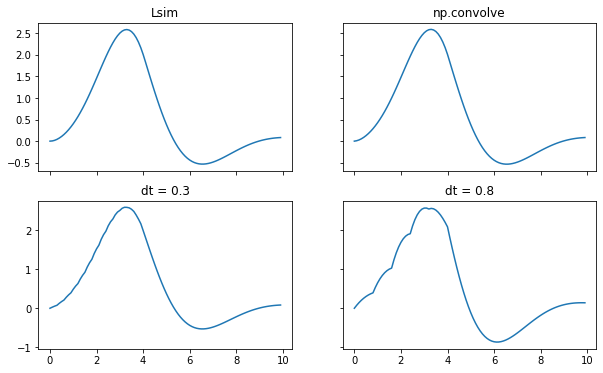

In [8]:
solved = lsim(sys,F,t)
solved_again = np.convolve(F,h)*DT

fig, ax = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(10, 6))
ax[0,0].plot(t,solved[0],label='exact')
ax[0,0].title.set_text('Lsim')
ax[0,1].plot(t,solved_again[0:len(t)],label='np.convolve')
ax[0,1].title.set_text('np.convolve')
ax[1,0].plot(t,approx2, label='DT = 0.3')
ax[1,0].title.set_text('dt = 0.3')
ax[1,1].plot(t,approx, label='DT = 0.8')
ax[1,1].title.set_text('dt = 0.8')
plt.show()

# we can see that our summed inpluse reponses match very well with the np.convolve function and the Lsim function

# Logistic Regression notebook

What is logistic regression
[Check out this video](https://www.youtube.com/watch?v=yIYKR4sgzI8)


## First we have to generate the data we will be using logistic regression on

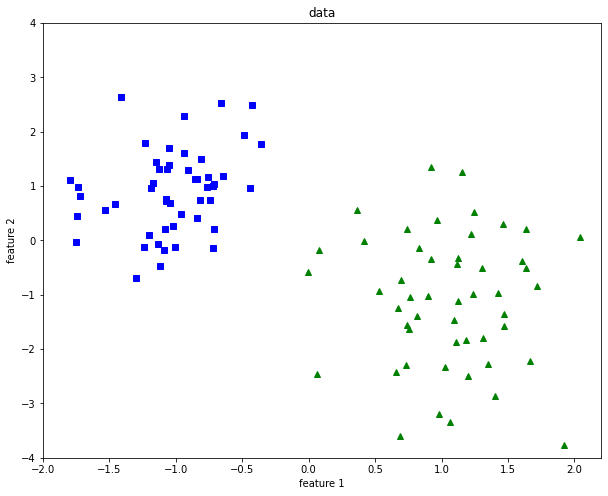

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=8, 
                           n_clusters_per_class=1)

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("data")
xmin, xmax = -2, 2.2
ymin, ymax = -4, 4
plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
plt.show()

# Next we need to look at the sigmoid function which is used for classification because it can map any real number to either zero or one.

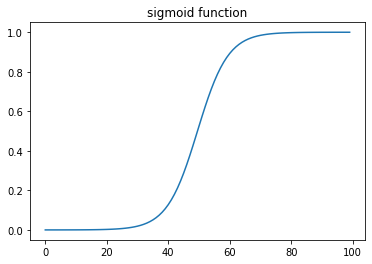

In [10]:
import numpy as np

def sigmoid(z):
    # sigmoid function needed for regression
    return 1.0/(1 + np.exp(-z))

array = np.linspace(-10,10,100)
sig_array = sigmoid(array)
plt.plot(sig_array)
plt.title("sigmoid function")
plt.show()

# Next we need to define our cost/loss function. This function is what we will use to determine how good the fit our of model currently is. Our goal is to find parameters which make the lowest cost. We can find this parameters by using gradient descent.

In [11]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

# Another important step is normalizing the data which is what this function does.

In [12]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

# This next function sets up the model and uses the function we defined above to find the best parameters.

In [13]:
def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses



# This function is to visualize how how our model did

In [14]:
def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    xmin, xmax = -2, 2.2
    ymin, ymax = -4, 4
    xd = np.array([xmin, xmax])
    yd = m*xd + c
    fig = plt.figure(figsize=(10,8))
    plt.ylim(ymin,ymax)
    plt.xlim(xmin,xmax)
    plt.plot(xd, yd, 'k', lw=1, ls='--')
    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
    plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')
    plt.show()

# Lets try out the model. First lets only run the model for 5 epochs. We can see that the model did an alright job but we can visually see that the model could be better. Next lets try increasing the epochs and seeing if things can get better.

<Figure size 720x576 with 0 Axes>

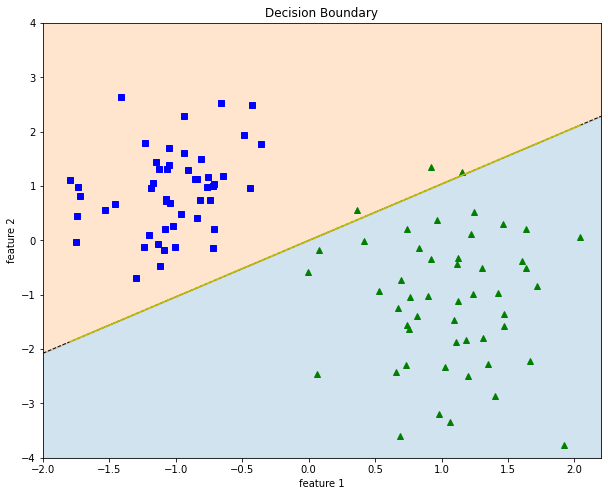

In [15]:
# running the model
w, b, l_epoch_5 = train(X, y, bs=100, epochs=5, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

# Now this looks a lot better

<Figure size 720x576 with 0 Axes>

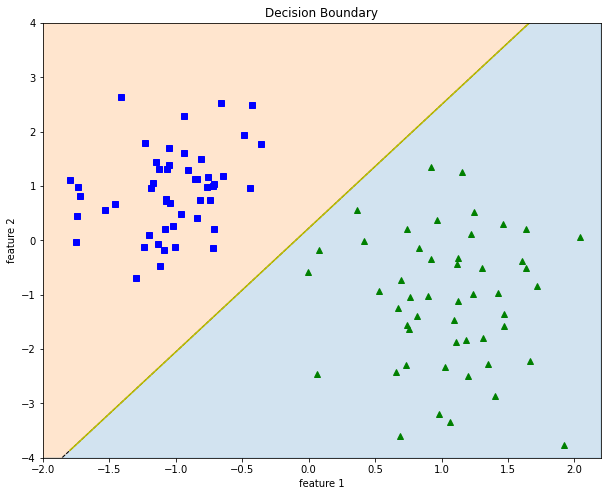

In [16]:
# running the model
w, b, l_epochs_5000 = train(X, y, bs=100, epochs=5000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

# We can look at the loss of both of these models and see that the model that was given more epochs to run was able to come up with a lower loss. We can also visualize the loss as the model is going.

The lost of a model ran with 5 epochs is 0.001190075865777983
The lost of a model ran with 5000 epochs is 0.007171315898448533


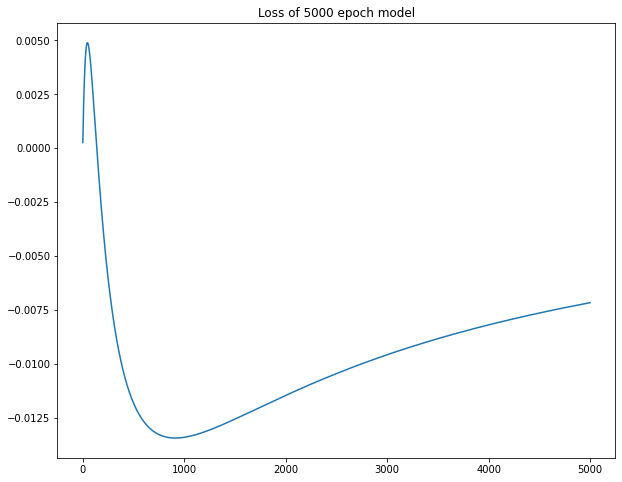

In [17]:
print('The lost of a model ran with 5 epochs is {}'.format(abs(l_epoch_5[4]))) # most recent loss found 4 cause python is 0 index
print('The lost of a model ran with 5000 epochs is {}'.format(abs(l_epochs_5000[4999])))

fig = plt.figure(figsize=(10,8))
plt.title('Loss of 5000 epoch model')
plt.plot(l_epochs_5000)
plt.show()

# to test how our homemade model did we can compare to the sklearn logistic regression model 

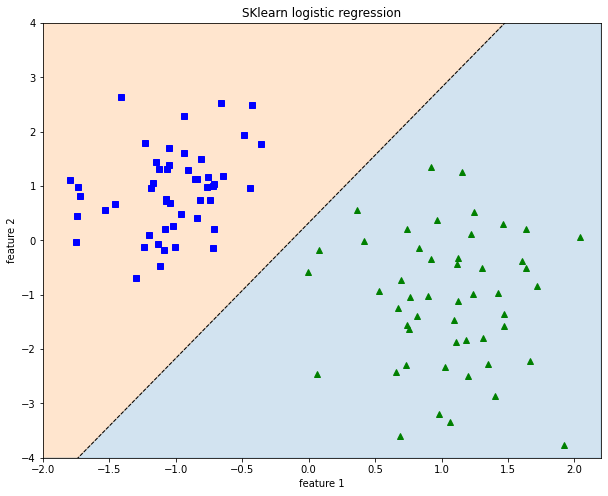

In [18]:
from sklearn.linear_model import LogisticRegression

# fit sklearn model
clf = LogisticRegression()
clf.fit(X, y)

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -2, 2.2
ymin, ymax = -4, 4
xd = np.array([xmin, xmax])
yd = m*xd + c
fig1 = plt.figure(figsize=(10,8))
plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel('feature 2')
plt.xlabel('feature 1')
plt.title("SKlearn logistic regression")
plt.show()



# The homemade model matched the Sklearn output very well

# resources will add videos later
https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2

https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/